In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline



In [2]:
df = pd.read_table('german.data.txt', delim_whitespace=True, names=["Checking_account_status","Month","Credit_history","Credit_Purpose",
                                                                           "Credit_amount",
                                                                           "Savings", "Employment_period", "Installment_rate",
                                                                           "Sex_Marital", "other_debtors", "Residence_period",
                                                                           "Property", "Age", "OtherInstallment",
                                                                           "Housing", "ExistCredits", "Job",
                                                                           "Liability", "Phone", "Foreign", "Predict"])

In [3]:
df.Predict.value_counts()

1    700
2    300
Name: Predict, dtype: int64

#### 700 were granted the credit. so, good credit customers.
#### 300 weren't granted the credit. so, bad credit customers.
#### We can see that the data set is not balanced with positive and negative differences of 400. 


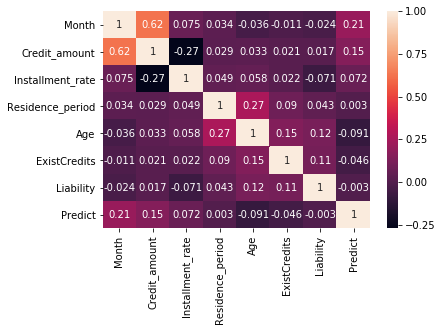

In [4]:
corr_pearson = df.corr(method='pearson')
sns.heatmap(corr_pearson,annot = True)

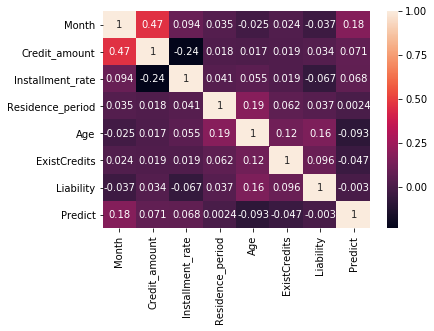

In [5]:
corr_kendall = df.corr(method = 'kendall')
sns.heatmap(corr_kendall, annot = True)

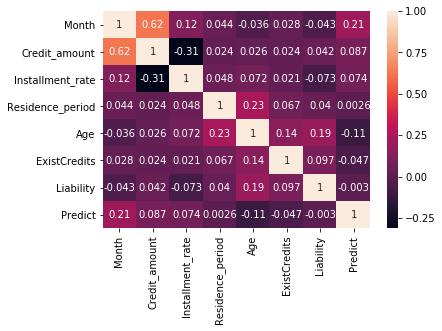

In [6]:
corr_spearman = df.corr(method = 'spearman')
sns.heatmap(corr_spearman, annot = True)

#### we can see that there is no strong correlation between any two  variables in particular.
#### we can also see that Credit_amount and month may have moderate correlation.

In [7]:
df.describe()

,Month,Credit_amount,Installment_rate,Residence_period,Age,ExistCredits,Liability,Predict
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


#### Here we saw that, for predict, it being categorical makes the statistics irrelevant.
#### However, since panda describe function gave the output on predict, it's not missing anything.
#### As a matter of fact, every column of data has statistics according to describe function. Hence, no missing values. 
#### Based on that, we only need to check if some categorical attributes that are missing.

In [8]:
df.head(5)

,Checking_account_status,Month,Credit_history,Credit_Purpose,Credit_amount,Savings,Employment_period,Installment_rate,Sex_Marital,other_debtors,...,Property,Age,OtherInstallment,Housing,ExistCredits,Job,Liability,Phone,Foreign,Predict
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [9]:
def check_missing_values(data_file, column_name):
    
    if data_file[column_name].isnull().values.any() == True:
        print(column_name,' is missing values')
        
    else:
        print(column_name,' is not missing any values')
        
# defining a list for categorical columns without predict column.
X = ["Checking_account_status","Credit_history","Credit_Purpose","Savings","Employment_period","Sex_Marital","other_debtors",
     'Property','OtherInstallment', 'Housing','Job','Phone','Foreign']

for column_name in X:
    check_missing_values(df, column_name)

Checking_account_status  is not missing any values
Credit_history  is not missing any values
Credit_Purpose  is not missing any values
Savings  is not missing any values
Employment_period  is not missing any values
Sex_Marital  is not missing any values
other_debtors  is not missing any values
Property  is not missing any values
OtherInstallment  is not missing any values
Housing  is not missing any values
Job  is not missing any values
Phone  is not missing any values
Foreign  is not missing any values


#### Now we know that data is not missing any values, lets build the binary classification model to train and test the random forest algorithm

In [10]:
# importing necessary functions for random forest algorithms.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix

#### converting data frames attributes into categorical numeric value so it is easy for classifier. It basically sets '1' for true attribute that the row follows and '0' for the attributes that the row doesn't follow.

In [11]:
german_one_hot_encode = pd.get_dummies(df)
german_one_hot_encode.head(5)

,Month,Credit_amount,Installment_rate,Residence_period,Age,ExistCredits,Liability,Predict,Checking_account_status_A11,Checking_account_status_A12,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Phone_A191,Phone_A192,Foreign_A201,Foreign_A202
0,6,1169,4,4,67,2,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,2,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,2,1,0,...,0,1,0,0,1,0,1,0,1,0


#### we can see that the column has increased from 21(in the original data frame) to 62. Matrix size has grown significantly.

In [12]:
# We are seperating the data that we want to use to predict from the target we want to predict.
data = german_one_hot_encode.drop('Predict', axis = 1)  
# whole column of predict from the data frame german_one_hot_encode is dropped.
target = german_one_hot_encode['Predict']
# the dropped column is taken as a target class.

In [13]:
data_train, data_test, target_train, target_test = train_test_split(data, target,test_size = .3, random_state = 1)
# with some research I realised that random_state just means how randomly data will be chosen for train and test sample. 
# Same number gives reproducable results. we will keep this number same through out.

#### Training data and testing data, and training target class and testing target class are defined with 7/10 for training and 3/10 for testing. Reason is that more data to train means better model. 

In [14]:
data_train.shape, data_test.shape, target_train.shape, target_test.shape
#to check how the training and testing datas are splitted.

((700, 61), (300, 61), (700,), (300,))

#### After splitting the data into training and testing, we want to oversample the training data and leave the testing data as it is for testing purpose as they are the true values.
#### By oversampling we increase more data set for bad credit customers so that the classifier doesn't get biased towards good credit customers.

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio = 'minority', random_state=1, kind='regular')
#setting up sm as sth like a function to use to oversample the minority class of bad credit customers.

In [16]:
data_train_oversample, target_train_oversample = sm.fit_sample(data_train, target_train)
# looking at the training data and the training target, we are oversampling them to produce new sets of training data and training targets
data_train_oversample.shape, target_train_oversample.shape
# to check how many datas we now have in the training data sets compared to 700 training and 300 testing data sets earlier

((972, 61), (972,))

#### We can see that 700 training datas which was biased with good credit customers has now been increased to 972 training datas with balanced set of good and bad credit customers.

### let's make the classifier ready now.
#### After some search, I came to find the major factors responsible for accuracy of the random forest model aren_estimators, max_features and sample leaf size.
#### I tried to use n_estimators value at 2000. maximum is better but that value was smooth for my processor. 
#### max_features, I left as auto meaning I didn't want to put any restrictions on the classifier. It will just use all the features that makes sense in every tree.
#### I didn't want to capture too much noise in the train data. so,I used the leaf size of 100.

In [17]:
rf = RandomForestClassifier(n_estimators = 2000, n_jobs = -1, random_state =12, max_features = "auto", min_samples_leaf = 100)
rf.fit(data_train_oversample,target_train_oversample)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [18]:
target_predict = rf.predict(data_test)
print(('accuracy: '),accuracy_score(target_test, target_predict))


accuracy:  0.76


In [19]:
accuracy_score(target_train_oversample, rf.predict(data_train_oversample))
# to check accuracy on training data. as expected, higher than the accuracy on test data.

0.80658436213991769

In [20]:
pd.DataFrame(confusion_matrix(target_test, target_predict), columns=['Good predicted customer', 'Bad predicted customer'],
    index=['Truely good customer', 'Truely bad customer'])

,Good predicted customer,Bad predicted customer
Truely good customer,179,35
Truely bad customer,37,49
